In [2]:
import numpy as np
import sympy as sy
import mpmath as mp
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.integrate import odeint
from scipy.spatial.distance import euclidean

## Problem Set 3 Q.1 - Quant Macro
### Weimin Zhou
### Due: 10, Oct, 2018

## Remarks:
  I use three different methods for numerical solving the transition path: 
- directly dynamic system simulation, simulation with imposing convergence condition in Python
- Linear Approximation methods, and Exponential convergence methods in Matlab

### Question 1. Computing Transitions in a RA Economy.

Consider the following closed optimal growth economy populated by a large number of identical infinitely lived households that maximize:

$$ E_0 \{ \sum^{\infty}_{t=0} \beta^t u(c_t) \}$$

over consumption and leisure $u(c_t) = \ln c_t$, subject to:

$$ c_t + i_t = y_t$$
$$ y_t = k^{1-\theta}_t (z h_t)^{\theta}$$
$$ i_t = k_{t+1} - (1-\delta)k_t$$
Where: 

LS: $\theta=0.67$
$ h_t = 0.31$
population does not grow

## (a) Steady-State
 Choose z to match an annual capital-output ratio of 4, and an
investment-output ratio of .25.

By Euler Equation of this economy:
$$ u'(c_t)=\beta u'(c_{t+1})[f'(k_{t+1})+(1-\delta)]$$

which in part (a) for Steady states is to solve:

$$(\frac{1-\beta (1-\delta)}{\beta (1-\theta)} )^{-1/ \theta} z^* h = k^*$$

where we need to choose $z$ to determine $k^*$:

labor output ratio of 4 is to say: $\frac{k}{h}= 4$. 

And investment-output ratio of .25 is to determine $ \delta = 0.25/0.4 $


In [3]:
# ==== Parameters ==== # 
# labor supply is elastic
h = .31
theta = .67


"""
By normalizing output = 1, then, capital-output ratio of 4 means k^ss = 4
"""
k = 4
# by investment-output ratio = .25
delta = 0.25/4
# hence: consumption is:
c = 0.75 
# by production function, we pin down z as: 
z = k**((theta-1)/theta) / h 

"""
def Util(c):
	return sy.log(c)

Uc  = sy.diff(Util(c),c)
"""

def F(k, z):
	"""production function (cobb-douglas)"""
	return (k) ** (1-theta) * (z*h) ** (theta)


def euler(beta): 
	"""Euler euqation in SS"""
	f = (1-theta)*(k)**(-theta) * (z*h)**theta + 1 - delta - 1/beta
	return f

solbeta = []
range1 = np.linspace(0.01,1,10)

# Check multiple starting points just in case: 
for i in range1:
	tmp = optimize.fsolve(euler, i)
	solbeta.append(tmp)

print('beta is', np.mean(solbeta))
print('z is', z)

beta0 =1/ ( (1-theta)*(k)**(-theta) * (z*h)**theta + 1 - delta)
print('beta from fsolve result should be coincide with analytical result:', beta0)

beta is 0.9803921568627325
z is 1.6296760964691641
beta from fsolve result should be coincide with analytical result: 0.9803921568627451


### Above analysis gives results that: 

$$k^{SS} = 4.000$$

$$z^{SS} = 1.630$$ 

$$c^{SS} = 0.750$$

$$s^{SS} = i^{SS} = 0.250$$ 

$$y = 1 ,\quad ht= 0.31 $$

parameter values pinned down: $\beta=0.980 ,\quad \delta = 0.0625 ,\quad$ 

parameter values given: $\theta=0.670 ,\quad h_t = 0.31$

## （b） Double permanently the productiviy parameter z and solve for the new steady state.


In [4]:
# ====  Parameters  ====#
z_new = 2*z

def euler_new(k): 
	"""Euler euqation in SS"""
	g = (1-theta)*(k)**(-theta) * (z_new*h)**theta + 1 - delta - 1/beta0
	return g

solk = []
range2 = np.linspace(1,10,10)

# Check multiple starting points just in case: 
for j in range2:
			tmp = optimize.fsolve(euler_new, j)
			solk.append(tmp[0])

print(np.mean(solk))

7.999999999999981


In [8]:
k2 = np.mean(solk)
y2 = (z_new*h)**theta * k2 ** (1-theta)
i2 = k2*delta
c2 = y2 - i2

print('new steady states of capital', k2)
print('new steady states of output', y2)
print('new steady states of investment',i2)
print('new steady states of consumption',c2)

new steady states of capital 7.999999999999981
new steady states of output 1.9999999999999984
new steady states of investment 0.49999999999999883
new steady states of consumption 1.4999999999999996


### When $z$ is double, k is therefor also doubled, which is reasonable since in the steady state conditions, k and z vary with same proportion. and however output is doubled, consumption is there doubled, but labor is by assumption stay constant for all t, values 0.31 as always. 

Now: 
$$s^{SS2} = i^{SS2} = 0.500$$

$$c^{SS2} = 1.500$$

$$k^{SS2} = 8.000$$

$$h^{SS2} = 0.310$$ 

$$y^{SS2} = 2.000$$ 

## Part (c) Compute the transition from the first to the second steady state and report the time-path for savings, consumption, labor and output.

I will shock the economy at the beginning period by changing parameters, which in this case is z=2*z, doubling the labor productivity shock. 

Firstly, I set up a general framework for (c), (d) and (e). 
Assuming utility function is log-linear. 

BC: $(1+\tau^{C}_{t})c_{t}+k_{t+1}-(1-\delta-\tau^{K}_{t})k_t = (1-\tau^{Y}_{t})f(k_t,h_t)$ 


### Transition path
Solving the RCK model is equivalent to finding, for some initial level of capital per effective labor $\hat{k}_{0}$, such $\hat{c}_{0}$ that the above forward equations bring $\hat{k}$ and $\hat{c}$ to the steady state. Along the transition to the steady state, the model variables have to obey the following conditions (the dynamic economic system are the following by Euler equation and BC):

$$ c_{t+1} = \beta \frac{1+\tau^{C}_{t}}{1+\tau^{C}_{t+1}} ((1-\tau^{Y}_{t+1})f'(k_{t+1},h_{t+1})+1-\delta-\tau^{K}_{t})c_t $$

$$ k_{t+1} = (1-\tau^{Y}_{t})f(k_{t},h_{t}) + (1-\delta)k_t - (1+\tau^{C}_{t})c_t $$

Where the steady states are computed by: 
$$ k_{ss} = (\frac{(1-\tau^{Y})(1-\theta)(zh)^{\theta}}{1/\beta - 1 + \delta + \tau^{K}})^{1/ \theta} $$

$$ c_{ss} = \frac{1}{1+\tau^{C}} [(1-\tau^{Y})f(k_{ss}) - (\delta + \tau^{K})k_{ss}]$$

1. Below I will first try straightly Algorithm to compute the transition path. 
2. After that, I will try shooting Algorithm 
3. and I also upload this general framework using Matlab to compute by different Approximation methods. 

In [139]:
import numpy as np
import sympy as sy
import matplotlib.pyplot as plt

# ==== Parameter after Change === #

alpha = 0.33 # labor share
delta = 0.25/4 # depreciation factor
sigma = 0.5 # CRRA
beta = .98 # discount factor
A = 1.00 # technology

# k = np.zeros( T + 1) # initial k path vector
# c = np.zeros( T + 1) # initial c path vector

kstar = ((alpha * beta * A) / (1 - beta + beta * delta)) ** (1 / (1 - alpha)) # k steady state
cstar = A * kstar ** alpha + (1 - delta) * kstar - kstar # c steady state

print(kstar, cstar)

7.859555390179036 1.4833877926037502


In [13]:
class Ramsey:

	def __init__(self, n=0.00,  # population growth rate
						delta=0.25/4,   # depreciation rate
						alpha=0.33,   # share of capital: means theta=0.67
						A=1.0,   # productivity
						sigma=0.999,
						beta=0.9803921568627325,
						z=1.6296760964691641,
						tauc=0,
						tauy=0,
						tauk=0,
						h=0.31,
						k=3.8,  # current capital stock
				 		c=0.4):  

		self.n, self.delta, self.alpha, self.A, self.sigma, self.beta = n, delta, alpha, A, sigma, beta
		self.z, self.tauc, self.tauy, self.tauk, self.h = z, tauc, tauy, tauk, h
		self.k = k
		self.c = c

	def q(self):
		"Evaluate capital"
		n, delta, alpha, A, sigma, beta = self.n, self.delta, self.alpha, self.A, self.sigma, self.beta
		z, tauy, tauk, h = self.z, self.tauy, self.tauk, self.h
		# Apply the update rule
		return (z*h)**(1-alpha)*(1-tauy)*A* self.k **alpha +(1-delta-tauk)* self.k - (1+self.tauc)* self.c

	def g(self):
		"Evaluate consumption * (1+tauc)"
		n, delta, alpha, A, sigma, beta = self.n, self.delta, self.alpha, self.A, self.sigma, self.beta
		z, tauy, tauk, h = self.z, self.tauy, self.tauk, self.h
		return self.c * beta * (1+self.tauc)*(A*alpha*(1-tauy)*self.q()**(alpha-1) * (z*h)**(1-alpha) +1-delta)

	def update(self):
		"Update the current state"
		self.k, self.c =  self.q(), self.g()/(1+self.tauc)

	def steady_state(self):
		"Compute the steady state value of capital."
		n, delta, alpha, A, sigma, beta = self.n, self.delta, self.alpha, self.A, self.sigma, self.beta
		z, tauy, tauk, h = self.z, self.tauy, self.tauk, self.h 
		# Compute and return steady state
		return (((1-tauy)*A*alpha*(z*h)**(1-alpha)) / (1/beta - 1 + delta + tauk))**(1 / (1 - alpha))

	def generate_sequence(self, t):
		"Generate and return a time series of length t"
		path = []
		for i in range(t):
			path.append(self.k)
			self.update()
		return path

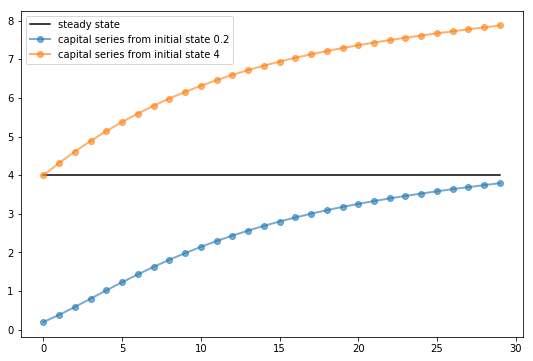

In [29]:
import matplotlib.pyplot as plt
c0 = np.array([0.17649911])
c1 = np.array([1.02350954])
s1 = Ramsey(k=4/20,c=0.17649911)
s2 = Ramsey(k=4,c=1.02350954,z=2*1.6296760964691641)

T = 30
fig, ax = plt.subplots(figsize=(9, 6))

# Plot the common steady state value of capital
ax.plot([s1.steady_state()]*T, 'k-', label='steady state')

# Plot time series for each economy
for s in s1, s2:
	lb = f'capital series from initial state {s.k}'
	ax.plot(s.generate_sequence(T), 'o-', lw=2, alpha=0.6, label=lb)

ax.legend()
plt.show()

### Above codes could replicate part (c), the transition from initial guess and between two steady states. However, such transition is simulated directly by the path of dynamic system, which in usually not recommended, hence, instead, I deliver methods of imporsing stablity (set convergence condition) in the following codes: 

In [132]:
from scipy.optimize import minimize
# Define needed functions

def ProductionFunction(k, params):
    α = params['α']
    z = params['z']
    h = params['h']
    tauy = params['tauy']
    
    return (1-tauy)*k**α* (z*h)**(1-α)

def InterestRate(k, params):
    α = params['α']
    δ = params['δ']
    z = params['z']
    h = params['h']
    tauy = params['tauy']
    return (1-tauy)*α*k**(α-1)* (z*h)**(1-α) - δ
    
    
def SteadyState(params):
	α = params['α']
	δ = params['δ']
	n = params['n']
	g = params['g']
	β = params['β']
	σ = params['σ']
	z = params['z']
	h = params['h']
	tauy = params['tauy']
	tauk = params['tauk']
	tauc = params['tauc']
	
	r_star = (1+n) * (1+g)**σ / β - 1
	k_star = (((1-tauy)*α*(z*h)**(1-α))/(r_star+δ+tauk))**(1/(1-α))
	c_star = (1/(1+tauc))*(ProductionFunction(k_star, params) - (δ+tauk+n+g+n*g)*k_star)
	
	return k_star, c_star

def ResourceConstraint(k, c, params):
    α = params['α']
    δ = params['δ']
    n = params['n']
    g = params['g']
    tauk = params['tauk']
    tauc = params['tauc']
    
    return (ProductionFunction(k, params) + (1-δ-tauk)*k - (1+tauc)*c)/((1+n)*(1+g))

def EulerEquation(k, c, params):
    n = params['n']
    g = params['g']
    β = params['β']
    σ = params['σ']
    tauk = params['tauk']
    
    k_next = ResourceConstraint(k, c, params)
    
    if k_next > 0:
        r = InterestRate(k_next, params)
        c_next = (β*(1+r-tauk)/(1+n))**(1/σ) * c / (1+g) #assume consumption tax is constant
        return c_next
    else:
        return 0

def Constant_k(k, params):
    δ = params['δ']
    n = params['n']
    g = params['g']
    
    return ProductionFunction(k, params) - (δ+n+g+n*g)*k

In [133]:
# Parameters
params = {'α':0.33, 'δ':0.25/4, 'n':0.0, 'g':0.0, 'σ':1, 'β':0.98,  'z':1.6297, 'h':0.31, 'tauk':0,  'tauc':0, 'tauy':0}

# Steady state
print(SteadyState(params))
k_star, c_star = SteadyState(params)

(3.97070240000618, 0.7494178965379631)


In [134]:
# Forward equations and convergence criterion

def Path(c_0, k_0, params, T=1000):
    
    T += 1
    
    k_t = np.zeros(T)
    c_t = np.zeros(T)
    
    k_t[0] = k_0
    c_t[0] = c_0
    
    for t in range(T-1):
        k_t[t+1] = ResourceConstraint(k_t[t], c_t[t], params)
        if k_t[t+1] > 0:
            c_t[t+1] = EulerEquation(k_t[t], c_t[t], params)
        else:
            k_t[t+1] = 0
            c_t[t+1] = 0
            
    return k_t, c_t

def Path_crit(c_0, k_0, params, T=100):
    
    k_t, c_t = Path(c_0, k_0, params, T)
    k_star, c_star = SteadyState(params)
    
    ss_diff = np.sqrt((k_t-k_star)**2 + (c_t-c_star)**2)
    
    return np.min(ss_diff) + ss_diff[-1]

In [135]:
k_0 = k_star / 20
# Find the function minimum, starting from an initial guess
result = minimize(Path_crit, 0.34, args=(k_0, params, 100), method='Nelder-Mead')
print(result)

c_0 = result.x
c_00 = c_0

 final_simplex: (array([[0.17649911],
       [0.17649911]]), array([0.00022531, 0.00026336]))
           fun: 0.00022531378555530783
       message: 'Optimization terminated successfully.'
          nfev: 84
           nit: 42
        status: 0
       success: True
             x: array([0.17649911])


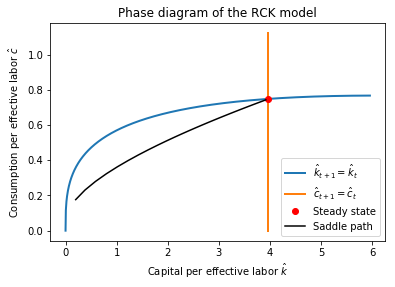

In [114]:
# Phase diagram
k_t, c_t = Path(c_0, k_0, params, 50)

kk = np.linspace(0, 1.5*k_star, 1000)
cc = np.linspace(0, 1.5*c_star, 1000)


plt.plot(kk, Constant_k(kk, params), lw=2, label='$\hat{k}_{t+1}=\hat{k}_{t}$')
plt.plot(kk**0 * k_star, cc, lw=2, label='$\hat{c}_{t+1}=\hat{c}_{t}$')
plt.plot(k_star, c_star, 'ro', label='Steady state')
plt.plot(k_t, c_t, 'k-', label='Saddle path')

plt.title('Phase diagram of the RCK model')
plt.xlabel('Capital per effective labor $\hat{k}$')
plt.ylabel('Consumption per effective labor $\hat{c}$')
plt.legend(loc='lower right')

plt.show()

### Above is to text the codes.

(7.941404800012359, 1.498835793075926)
 final_simplex: (array([[1.02749094],
       [1.02749068]]), array([0.01825765, 0.01827213]))
           fun: 0.01825765262737943
       message: 'Optimization terminated successfully.'
          nfev: 58
           nit: 29
        status: 0
       success: True
             x: array([1.02749094])


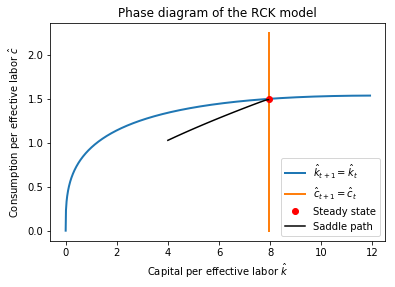

In [147]:


# Parameters: double the productivity parameter z permanently 
params = {'α':0.33, 'δ':0.25/4, 'n':0.0, 'g':0.0, 'σ':1, 'β':0.98,  'z':2*1.6297, 'h':0.31, 'tauk':0,  'tauc':0, 'tauy':0}

# Steady state
print(SteadyState(params))
k_star, c_star = SteadyState(params)

k_0 = 4.0
# Find the function minimum, starting from an initial guess
result = minimize(Path_crit, 0.34, args=(k_0, params, 50), method='Nelder-Mead')
print(result)

c_0 = result.x

k_t, c_t = Path(c_0, k_0, params, 50)
kk = np.linspace(0, 1.5*k_star, 1000)
cc = np.linspace(0, 1.5*c_star, 1000)


plt.plot(kk, Constant_k(kk, params), lw=2, label='$\hat{k}_{t+1}=\hat{k}_{t}$')
plt.plot(kk**0 * k_star, cc, lw=2, label='$\hat{c}_{t+1}=\hat{c}_{t}$')
plt.plot(k_star, c_star, 'ro', label='Steady state')
plt.plot(k_t, c_t, 'k-', label='Saddle path')

plt.title('Phase diagram of the RCK model')
plt.xlabel('Capital per effective labor $\hat{k}$')
plt.ylabel('Consumption per effective labor $\hat{c}$')
plt.legend(loc='lower right')

plt.show()

k_int = k_t
c_int = c_t # store the value 

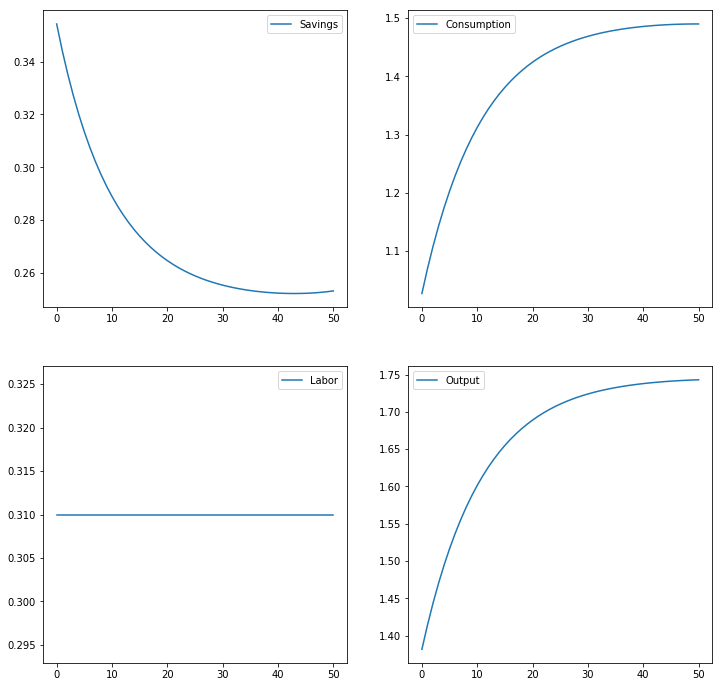

In [116]:
s_t = 1 - c_t/ProductionFunction(k_t, params)
h_t = np.full(np.shape(s_t),h)
y_t = s_t + c_t

fig = plt.figure(figsize=(12, 12))
plt.subplot(221)
plt.plot(s_t, label='Savings')
plt.legend()

plt.subplot(222)
plt.plot(c_t, label='Consumption')
plt.legend()

plt.subplot(223)
plt.plot(h_t, label='Labor')
plt.legend()

plt.subplot(224)
plt.plot(y_t, label='Output')

plt.legend()
plt.show()

### Above codes deliver the same results for part (c). 

 Interpretation: 

Compared with two phase diagrams, we could conclude that A Permanent Producitivity shock shift up both isoclines of consumption and labor. After the permanent shock, the economy moves to a new nonstochastic steady state. 

For the increasing consumption towards a new steady state, this rise is due to the wealth effect. However, for labor demand is always constant by assumption, to release such assumption need to control output still as normalized to 1, which leads a decreasing labor demand, however, which if under general equilibrium (containing firm level), where high consumption shifts labor supply curve in, and hence leads to a net positive effect on wage rate.  

### Part (d) Unexpected shocks. Let the agents believe productivity zt doubles once and for all periods. However, after 10 periods, surprise the economy by cutting the productivity zt back to its original value.



(7.941404800012359, 1.498835793075926)
 final_simplex: (array([[0.92942188],
       [0.92935547]]), array([0.80744155, 0.80744273]))
           fun: 0.8074415486828667
       message: 'Optimization terminated successfully.'
          nfev: 34
           nit: 17
        status: 0
       success: True
             x: array([0.92942188])


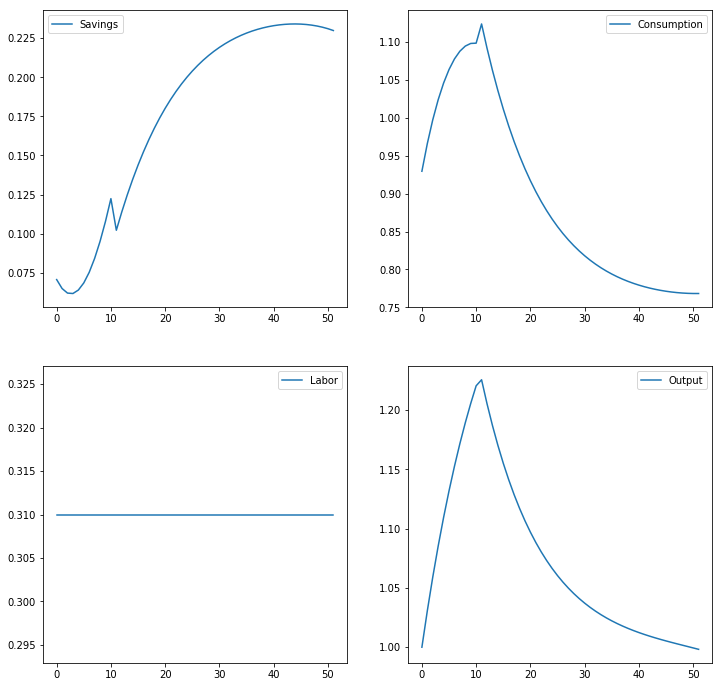

In [117]:
# Parameters: double the productivity parameter z permanently 
params = {'α':0.33, 'δ':0.25/4, 'n':0.0, 'g':0.0, 'σ':1, 'β':0.98,  'z':2*1.6297, 'h':0.31, 'tauk':0,  'tauc':0, 'tauy':0}

# Steady state
print(SteadyState(params))
k_star, c_star = SteadyState(params)

k_0 = 4 # Old steady states

# Find the function minimum, starting from an initial guess
result = minimize(Path_crit, 0.34, args=(k_0, params, 10), method='Nelder-Mead')
print(result)

c_0 = result.x

k_t, c_t = Path(c_0, k_0, params, 10)  # 10 Periods shocks


k_00 = k_t[10]

params = {'α':0.33, 'δ':0.25/4, 'n':0.0, 'g':0.0, 'σ':1, 'β':0.98,  'z':1.6297, 'h':0.31, 'tauk':0,  'tauc':0, 'tauy':0}

result = minimize(Path_crit, 0.34, args=(k_00, params, 40), method='Nelder-Mead')
c_00 = result.x
k_t1, c_t1 = Path(c_00, k_00, params, 40)
k_t = np.append(k_t, k_t1)
c_t = np.append(c_t, c_t1)


s_t = 1 - c_t/ProductionFunction(k_t, params)
h_t = np.full(np.shape(s_t),h)
alpha = 0.33
z = 1.6297
y_t = s_t + c_t


fig = plt.figure(figsize=(12, 12))
plt.subplot(221)
plt.plot(s_t, label='Savings')
plt.legend()

plt.subplot(222)
plt.plot(c_t, label='Consumption')
plt.legend()

plt.subplot(223)
plt.plot(h_t, label='Labor')
plt.legend()

plt.subplot(224)
plt.plot(y_t, label='Output')

plt.legend()
plt.show()

### Undexpected shocks.

For an unexpected shocks, consumption rises initially and then falls back to original steady state along the path. In figure, which indicates a rise from 0 to 10 periods of consumption, and then fall back to 0.75(the steady states consumption level).

By comparing, the initial impact on output is larger in the Permanent shock than the unexpected shocks. Because agnes believe producitivity would double for all periods but not.

## (e) Bonus Question: Add a permanent consumption tax. and a permanent capital tax.
Insight:  convergence to Steady States would be slower.

(7.941404800012359, 1.3625779937053872)
 final_simplex: (array([[0.32090003],
       [0.32090016]]), array([0.03850743, 0.03860532]))
           fun: 0.03850742571330672
       message: 'Optimization terminated successfully.'
          nfev: 40
           nit: 20
        status: 0
       success: True
             x: array([0.32090003])


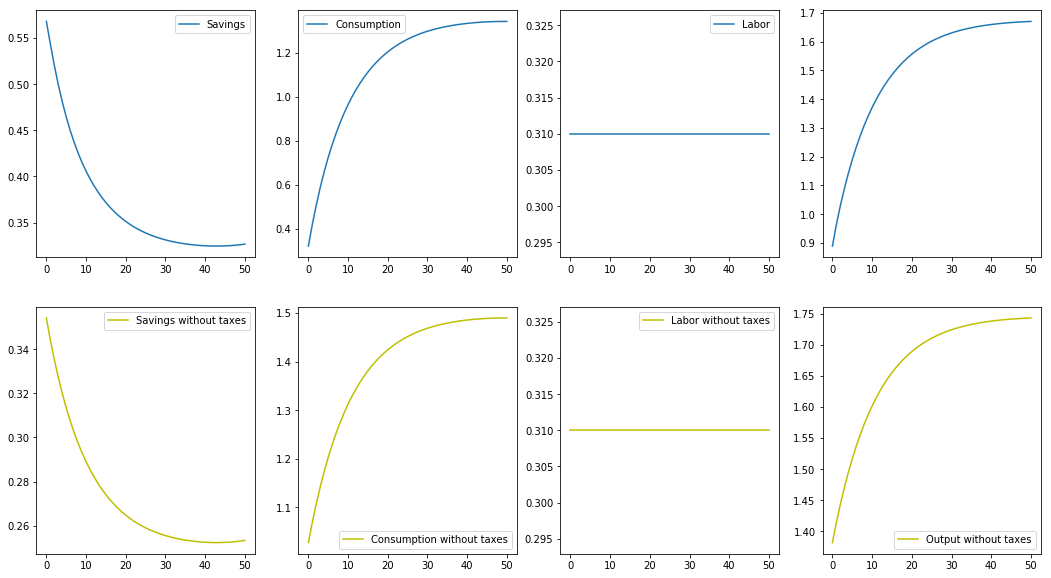

In [148]:
"""
With a permanent constant consumption tax rates
"""
params = {'α':0.33, 'δ':0.25/4, 'n':0.0, 'g':0.0, 'σ':1, 'β':0.98,  'z':2*1.6297, 'h':0.31, 'tauk':0,  'tauc':0.1, 'tauy':0}

# Steady state
print(SteadyState(params))
k_star, c_star = SteadyState(params)

k_0 = k_star/20
# Find the function minimum, starting from an initial guess
result = minimize(Path_crit, 0.34, args=(k_0, params, 50), method='Nelder-Mead')
print(result)

c_0 = result.x

k_t, c_t = Path(c_0, k_0, params, 50)  


s_t = 1 - c_t/ProductionFunction(k_t, params)
h_t = np.full(np.shape(s_t),h)
y_t = s_t + c_t


fig = plt.figure(figsize=(18, 10))
plt.subplot(241)
plt.plot(s_t, label='Savings')
plt.legend()

plt.subplot(242)
plt.plot(c_t, label='Consumption')
plt.legend()

plt.subplot(243)
plt.plot(h_t, label='Labor')
plt.legend()

plt.subplot(244)
plt.plot(y_t, label='Output')

# recall that the initial baseline capital and consumption is k_int and c_int
params0 = {'α':0.33, 'δ':0.25/4, 'n':0.0, 'g':0.0, 'σ':1, 'β':0.98,  'z':2*1.6297, 'h':0.31, 'tauk':0,  'tauc':0, 'tauy':0}

s_int = 1 - c_int/ProductionFunction(k_int, params0)
h_int = np.full(np.shape(s_int),h)
y_int = s_int + c_int

plt.subplot(245)
plt.plot(s_int, color='y', label='Savings without taxes')
plt.legend()

plt.subplot(246)
plt.plot(c_int, color='y', label='Consumption without taxes')
plt.legend()

plt.subplot(247)
plt.plot(h_int, color='y', label='Labor without taxes')
plt.legend()

plt.subplot(248)
plt.plot(y_int, color='y', label='Output without taxes')

plt.legend()
plt.show()

### By adding a permanent consumption tax. Since it doesnot show up in the dynamic system of capital, thus capital transition remains the same, but consumption is slower since new steady states are smaller

(2.897798278686856, 1.0175940334514912)
 final_simplex: (array([[0.27078206],
       [0.27078207]]), array([0.00298476, 0.00304043]))
           fun: 0.0029847642431191403
       message: 'Optimization terminated successfully.'
          nfev: 56
           nit: 28
        status: 0
       success: True
             x: array([0.27078206])


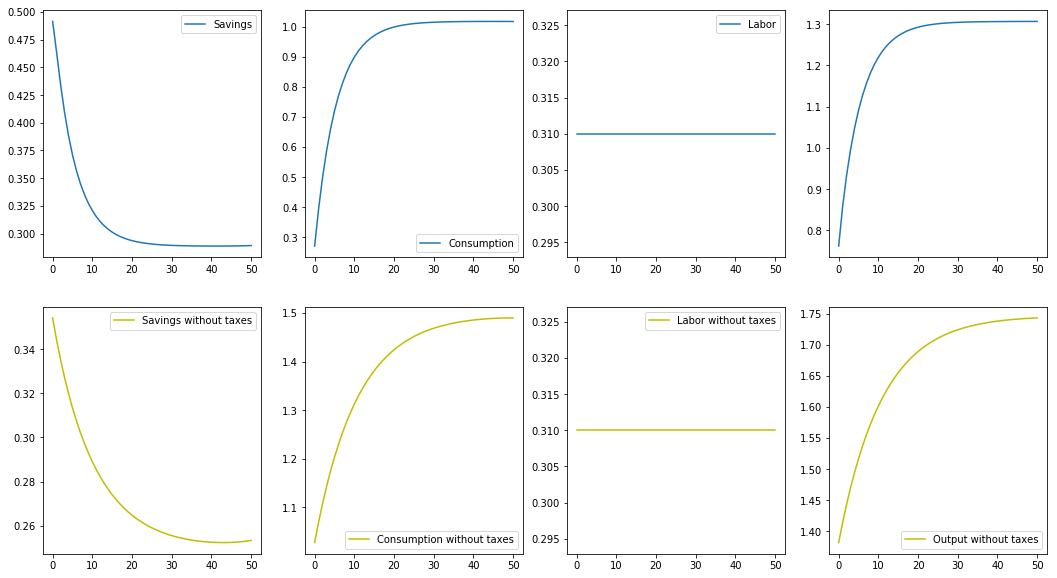

In [149]:
"""
With a permanent constant capital tax
"""
params = {'α':0.33, 'δ':0.25/4, 'n':0.0, 'g':0.0, 'σ':1, 'β':0.98,  'z':2*1.6297, 'h':0.31, 'tauk':0.08,  'tauc':0, 'tauy':0}

# Steady state
print(SteadyState(params))
k_star, c_star = SteadyState(params)

k_0 = k_star/20
# Find the function minimum, starting from an initial guess
result = minimize(Path_crit, 0.34, args=(k_0, params, 50), method='Nelder-Mead')
print(result)

c_0 = result.x

k_t, c_t = Path(c_0, k_0, params, 50)  


s_t = 1 - c_t/ProductionFunction(k_t, params)
h_t = np.full(np.shape(s_t),h)
y_t = s_t + c_t


fig = plt.figure(figsize=(18, 10))
plt.subplot(241)
plt.plot(s_t, label='Savings')
plt.legend()

plt.subplot(242)
plt.plot(c_t, label='Consumption')
plt.legend()

plt.subplot(243)
plt.plot(h_t, label='Labor')
plt.legend()

plt.subplot(244)
plt.plot(y_t, label='Output')

# recall that the initial baseline capital and consumption is k_int and c_int
params0 = {'α':0.33, 'δ':0.25/4, 'n':0.0, 'g':0.0, 'σ':1, 'β':0.98,  'z':2*1.6297, 'h':0.31, 'tauk':0,  'tauc':0, 'tauy':0}

s_int = 1 - c_int/ProductionFunction(k_int, params0)
h_int = np.full(np.shape(s_int),h)
y_int = s_int + c_int

plt.subplot(245)
plt.plot(s_int, color='y', label='Savings without taxes')
plt.legend()

plt.subplot(246)
plt.plot(c_int, color='y', label='Consumption without taxes')
plt.legend()

plt.subplot(247)
plt.plot(h_int, color='y', label='Labor without taxes')
plt.legend()

plt.subplot(248)
plt.plot(y_int, color='y', label='Output without taxes')

plt.legend()
plt.show()

###  sluggish transitional dynamic when imposing taxation
Since in the Ramsey model, I only put taxes but there's a still partial equilibrium which does not have a government spending for consuming taxes revenue, hence, the steady states level drops down and the convergence speed is slower for all variables if taxing capital and speed is the same if taxing consumption. 

New Stady States for a permanent consumption tax of 10%: 
$$ k^{SS}= 7.941$$
$$ c^{SS}= 1.363$$

New Stady States for a permanent capital tax of 8%: 
$$ k^{SS}= 2.898$$
$$ c^{SS}= 1.018$$

## I also attached the matlab figure of transition using Approximation methods
However, they are almost the same as the figures in Python, so I didn't add it in my notebook. Matlab files and relative figures are uploaded in PS3_Q1_Maltab files

### Approximation Approach:
For BC:
$$ k_{t+1} - k_{ss} - [(1-\tau^{y})f'(k_{ss})+(1-\delta-\tau^{k})](k_t  - k_{ss}) + (1+\tau^c) (c_t - c_{ss})=0$$
which by steady states condition, reduces to:
$$ k_{t+1} - k_{ss} = \frac{1}{\beta}(k_{t} - k_{ss}) - (1+\tau^c) (c_t - c_{ss})$$

---

For Euler equation: 
$$ c_{t+1} - c_{ss} = [\beta (1-\tau^{y})f''(k_{ss})]c_{ss}(k_t  - k_{ss}) + [\beta(1-\tau^{y})f'(k_{ss})+(1-\delta-\tau^{k})](c_t - c_{ss})$$

which reduces to:
$$ c_{t+1} - c_{ss} -  \beta(1-\tau^{y})f'(k_{ss})c_{ss}(k_t  - k_{ss})=c_t - c_{ss}$$

By Jacobian Matrix Manipulation, we can obtain a system in the following:
$$ k_{t} - k_{ss}=\mu^t (k_{0} - k_{ss})$$
$$ c_{t} - c_{ss}=\mu^t (c_{0} - c_{ss})$$


## Part (f) Bonus
$$ u(c_t) = \ln (c_t - \bar c)$$

hence, FOC changes to: 
$$ 1/(c_t - \bar c) = \beta (1/(c_{t+1}-\bar c))\{ (1-\theta)k_{t+1}^(-\theta) (zh)^{\theta} + 1-\delta   \}$$

Hence, Steady States doesn't change. But but adjusted by $\bar c$, which can be denoted as a structural change limit bound, hence, larger $\bar c$ would provide less space for agents to "jump to another structure".

## Part (g) Bonus
$$ u(c_t) = \ln (c_t -b c_{t-1})$$
hence, FOC changes to: 
$$ [\frac{1}{c_t - b c_{t-1}} - \beta \frac{b}{c_{t+1} - b c_{t}}]$$
$$ = [\beta \frac{1}{c_{t+1} - b c_{t}} - \beta^2 \frac{b}{c_{t+2} - b c_{t+1}}]((1-\theta)k^{-\theta}_{t+1} (zh)^{\theta} + 1-\delta)$$

hence, by deriving the Steady states, we remain the same level as previous one, but however, it could converge in a different speed given specific parameters $b$. This is a typtical results coming from a moral habit model for agents. 